**Data Loading from the Respective Directories**

In [19]:
import os
import numpy as np
import cv2
from tqdm import tqdm

ct_folder = "LUNA16_segmentation_data/ct"
mask_folder = "LUNA16_segmentation_data/mask"
output_path = "LUNA16_segmentation_data/numpy_data"

os.makedirs(output_path, exist_ok=True)

image_filenames = os.listdir(ct_folder)
mask_filenames = os.listdir(mask_folder)

image_dict = {os.path.splitext(f)[0]: os.path.join(ct_folder, f) for f in image_filenames}
mask_dict = {os.path.splitext(f)[0]: os.path.join(mask_folder, f) for f in mask_filenames}

common_keys = set(image_dict.keys()).intersection(set(mask_dict.keys()))
assert len(common_keys) == len(image_dict) == len(mask_dict), "Mismatch in image and mask filenames!"

images_dict = {}
masks_dict = {}

for key in tqdm(common_keys, desc="Processing images and masks"):
    img_path = image_dict[key]
    mask_path = mask_dict[key]

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  

    img = cv2.resize(img, (128, 128))
    mask = cv2.resize(mask, (128, 128))

    mask = (mask > 0).astype(np.uint8)  

    images_dict[int(key)] = img
    masks_dict[int(key)] = mask

max_index = max(images_dict.keys()) + 1
images = np.zeros((max_index, 128, 128, 1), dtype=np.uint8)  
masks = np.zeros((max_index, 128, 128, 1), dtype=np.uint8)

for idx, img in images_dict.items():
    images[idx, :, :, 0] = img  
    masks[idx, :, :, 0] = masks_dict[idx]

print(f"Saved images and masks as NumPy arrays in {output_path}")


Processing images and masks: 100%|██████████| 523/523 [00:01<00:00, 324.81it/s]

Saved images and masks as NumPy arrays in LUNA16_segmentation_data/numpy_data


**Image Visualization**

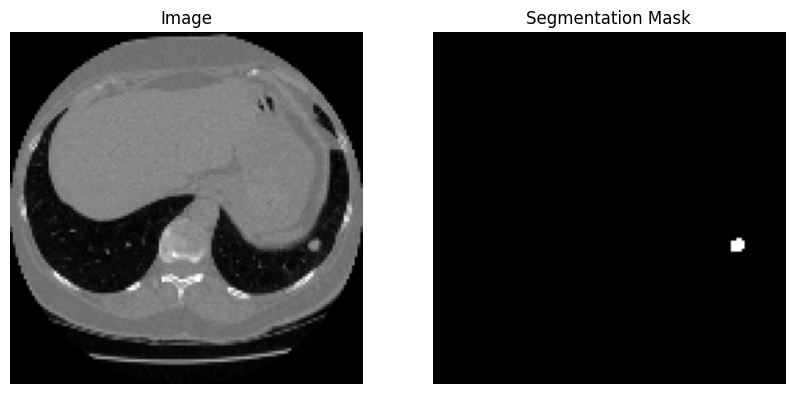

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def show_image_with_mask(index):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(images[index].squeeze(), cmap='gray')
    plt.title("Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(masks[index], cmap='gray')
    plt.title("Segmentation Mask")
    plt.axis("off")

    plt.show()

show_image_with_mask(0)


**Shape and Size Verification**

In [21]:
import numpy as np

print(f"Images Shape: {images.shape}")
print(f"Masks Shape: {masks.shape}")

index = 0 
print(f"Single Image Shape: {images[index].shape}")
print(f"Single Mask Shape: {masks[index].shape}")

Images Shape: (1067, 128, 128, 1)
Masks Shape: (1067, 128, 128, 1)
Single Image Shape: (128, 128, 1)
Single Mask Shape: (128, 128, 1)


**Applying Contrast Limited Adaptive Histogram Equalization (CLAHE)**

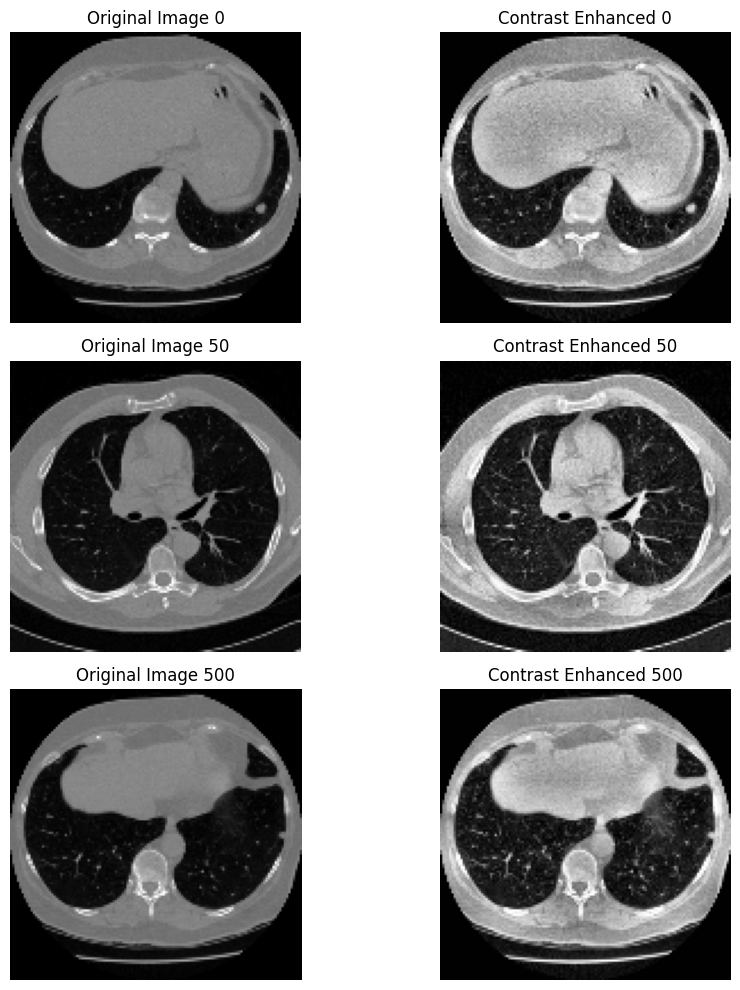

Contrast-enhanced images saved successfully!


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced_image = clahe.apply(image.astype(np.uint8)) 
    return enhanced_image

num_images = images.shape[0]
contrast_enhanced_images = np.zeros_like(images)  

for i in range(num_images):
    contrast_enhanced_images[i, :, :, 0] = apply_clahe(images[i, :, :, 0])

sample_indices = [0, 50, 500] 

fig, axes = plt.subplots(len(sample_indices), 2, figsize=(10, 10))

for i, idx in enumerate(sample_indices):
    original = images[idx, :, :, 0]
    enhanced = contrast_enhanced_images[idx, :, :, 0]
    
    axes[i, 0].imshow(original, cmap='gray')
    axes[i, 0].set_title(f"Original Image {idx}")
    axes[i, 0].axis("off")
    
    axes[i, 1].imshow(enhanced, cmap='gray')
    axes[i, 1].set_title(f"Contrast Enhanced {idx}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

print("Contrast-enhanced images saved successfully!")


**Image Normalization and Visualization**

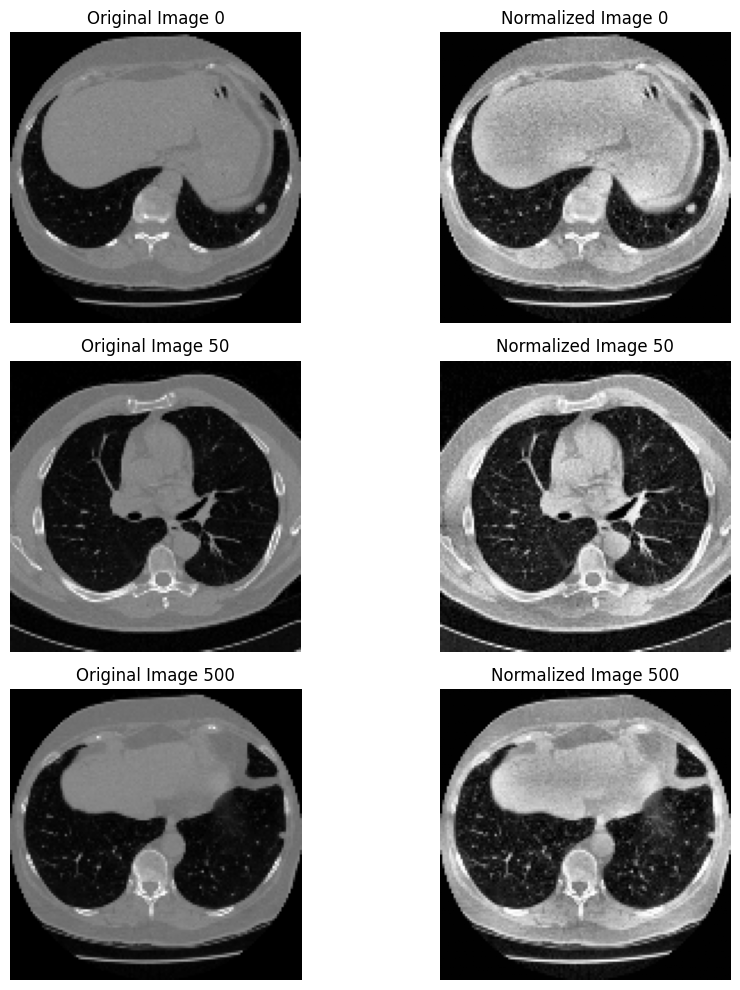

Normalized images saved successfully!


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_image(image):
    """ Normalize image to range [0, 1] """
    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image) + 1e-8)  
    return normalized_image

num_images = contrast_enhanced_images.shape[0]
normalized_images = np.zeros_like(contrast_enhanced_images, dtype=np.float32)  

for i in range(num_images):
    normalized_images[i, :, :, 0] = normalize_image(contrast_enhanced_images[i, :, :, 0])


sample_indices = [0, 50, 500] 

fig, axes = plt.subplots(len(sample_indices), 2, figsize=(10, 10))

for i, idx in enumerate(sample_indices):
    original = images[idx, :, :, 0]
    normalized = normalized_images[idx, :, :, 0]
    
    axes[i, 0].imshow(original, cmap='gray')
    axes[i, 0].set_title(f"Original Image {idx}")
    axes[i, 0].axis("off")
    
    axes[i, 1].imshow(normalized, cmap='gray')
    axes[i, 1].set_title(f"Normalized Image {idx}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

print("Normalized images saved successfully!")


In [24]:
preprocessed_images=normalized_images

In [25]:
print(len(preprocessed_images))
print(len(masks))

1067
1067


In [26]:
processed_img1=preprocessed_images

**Normalizing Masks**

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_image(image):
    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image) + 1e-8)  
    return normalized_image

num_images = masks.shape[0]
preprocessed_masks = np.zeros_like(masks, dtype=np.float32)  

for i in range(num_images):
    preprocessed_masks[i, :, :, 0] = normalize_image(masks[i, :, :, 0])

print("Normalized masks saved successfully!")


Normalized masks saved successfully!


In [28]:
processed_masks=preprocessed_masks

**Preprocessed Images and Masks Size and Shape Verification**

In [29]:
import numpy as np

print(f"Images Shape: {processed_img1.shape}")
print(f"Masks Shape: {processed_masks.shape}")

index = 0 
print(f"Single Image Shape: {processed_img1[index].shape}")
print(f"Single Mask Shape: {processed_masks[index].shape}")

Images Shape: (1067, 128, 128, 1)
Masks Shape: (1067, 128, 128, 1)
Single Image Shape: (128, 128, 1)
Single Mask Shape: (128, 128, 1)


**Saving the Data as Numpy Arrays**

In [30]:
import numpy as np

def is_black_image(image):
    return np.max(image) == 0  

black_indices = [i for i in range(processed_img1.shape[0]) if is_black_image(processed_img1[i, :, :, 0]) and is_black_image(processed_masks[i, :, :, 0])]

filtered_images1 = np.delete(processed_img1, black_indices, axis=0)
filtered_masks = np.delete(processed_masks, black_indices, axis=0)

np.save("filtered_processed_images1.npy", filtered_images1)
np.save("filtered_processed_masks.npy", filtered_masks)
print("Filtered images and masks saved successfully!")


Filtered images and masks saved successfully!
